## Problem Statement:

An E Commerce company /DTH provider is 
facing a lot of competition in the current market and it has become a challenge to retain the 
existing customers in the current situation. Hence, the company wants to develop a model 
through which they can do churn prediction of the accounts and provide segmented offers to the 
potential churners. In this company, account churn is a major thing because 1 account can have 
multiple customers. Hence, by losing one account the company might be losing more than one 
customer.

Develop a churn prediction model for this company and provide 
business recommendations on the campaign.
Campaign suggestion should be unique and be very clear on the campaign offer because 
your recommendation will go through the revenue assurance team. If they find that you are 
giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going 
to approve your recommendation. 
Hence be very careful while providing campaign recommendation.


### An Overview of the excel data set:

There are 19 columns out of which the 'Churn' field is the target variable. 
On observing the data types of the columns we can see that 14 fields are int/float type and 5 fields are object types.We can observe that out of the 18 predictor variables, we have only 17 useful variables since 'AccountID' is a unique identifier hence does not pose as a strong predictor.

In [1]:
# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the Dataset

In [4]:
com = pd.read_excel('Customer Churn Data.xlsx')

In [5]:
com.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [6]:
com.shape

(11260, 19)

In [7]:
#We can confirm that the data has been loaded properly.

In [8]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

###### We can find that some Integer/float fields are depicted as object(eg.Tenure,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback)

In [9]:
com.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260,NaN,NaN,NaN,25629.5,3250.63,20000,22814.8,25629.5,28444.2,31259
Churn,11260,NaN,NaN,NaN,0.168384,0.374223,0,0,0,0,1
Tenure,11158,38,1,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148,NaN,NaN,NaN,1.65393,0.915015,1,1,1,3,3
CC_Contacted_LY,11158,NaN,NaN,NaN,17.8671,8.85327,4,11,16,23,132
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162,NaN,NaN,NaN,2.90253,0.725584,0,2,3,3,5
Account_user_count,11148,7,4,4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
com.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [11]:
#Checking for unique values for the miscasted field types:

In [12]:
com['Tenure'].dtype

dtype('O')

In [13]:
com['Tenure'].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [14]:
# We see the '#' has appeared because of which this field is showing as object type.

#### Applying cleanup for special character:

In [15]:
com['Tenure'].dtype

dtype('O')

In [16]:
com['Tenure'] = com['Tenure'].replace('#',np.nan)

In [17]:
com['Tenure'].unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [18]:
com['Tenure'].value_counts()

1.0     1351
0.0     1231
8.0      519
9.0      496
7.0      450
10.0     423
3.0      410
4.0      403
5.0      403
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     311
16.0     291
19.0     273
18.0     253
20.0     217
17.0     215
21.0     170
23.0     169
22.0     151
24.0     147
28.0     137
30.0     137
27.0     131
99.0     131
26.0     122
29.0     114
25.0     114
31.0      96
51.0       2
60.0       2
61.0       2
50.0       2
Name: Tenure, dtype: int64

In [19]:
com['Tenure'].dtype

dtype('float64')

In [20]:
com['Tenure'].describe()

count    11042.000000
mean        11.025086
std         12.879782
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         99.000000
Name: Tenure, dtype: float64

In [21]:
#Similarly for other fields

In [22]:
com.dtypes

AccountID                    int64
Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [23]:
com['Account_user_count'].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [24]:
com['Account_user_count'] = com['Account_user_count'].replace('@',np.nan)

In [25]:
com['Account_user_count'].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [26]:
com['Account_user_count'].describe()

count    10816.000000
mean         3.692862
std          1.022976
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Account_user_count, dtype: float64

In [27]:
com['rev_per_month'].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [28]:
com['rev_per_month'].dtypes

dtype('O')

In [29]:
com['rev_per_month'] = com['rev_per_month'].replace('+',np.nan)

In [30]:
com['rev_per_month'].dtypes

dtype('float64')

In [31]:
com['rev_per_month'].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [32]:
com['rev_per_month'].describe()

count    10469.000000
mean         6.362594
std         11.909686
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64

In [33]:
com['rev_growth_yoy'].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [34]:
com['rev_growth_yoy'] = com['rev_growth_yoy'].replace('$',np.nan)

In [35]:
com['rev_growth_yoy'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [36]:
com['rev_growth_yoy'].describe()

count    11257.000000
mean        16.193391
std          3.757721
min          4.000000
25%         13.000000
50%         15.000000
75%         19.000000
max         28.000000
Name: rev_growth_yoy, dtype: float64

In [37]:
com['coupon_used_for_payment'].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [38]:
com['coupon_used_for_payment'] = com['coupon_used_for_payment'].replace('#',np.nan)
com['coupon_used_for_payment'] = com['coupon_used_for_payment'].replace('$',np.nan)
com['coupon_used_for_payment'] = com['coupon_used_for_payment'].replace('*',np.nan)

In [39]:
com['coupon_used_for_payment'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [40]:
com['coupon_used_for_payment'].describe()

count    11257.000000
mean         1.790619
std          1.969551
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: coupon_used_for_payment, dtype: float64

In [41]:
com['Day_Since_CC_connect'].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [42]:
com['Day_Since_CC_connect'] = com['Day_Since_CC_connect'].replace('$',np.nan)

In [43]:
com['Day_Since_CC_connect'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [44]:
com['Day_Since_CC_connect'].describe()

count    10902.000000
mean         4.633187
std          3.697637
min          0.000000
25%          2.000000
50%          3.000000
75%          8.000000
max         47.000000
Name: Day_Since_CC_connect, dtype: float64

In [45]:
com['cashback'].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [46]:
com['cashback'].value_counts()

155.62    10
152.28     9
154.73     9
149.36     9
149.68     9
          ..
193.45     1
240.82     1
220.57     1
111.51     1
154.44     1
Name: cashback, Length: 5693, dtype: int64

In [47]:
temp = pd.DataFrame(com.cashback.str.isdigit())
temp[temp['cashback']==False]

,cashback
440,False
1257,False


In [48]:
display(com['cashback'].iloc[440])
display(com['cashback'].iloc[1257])

'$'

'$'

In [49]:
com['cashback'] = com['cashback'].replace('$',np.nan)

In [50]:
com['cashback'].unique()

array([159.93, 120.9 ,    nan, ..., 227.36, 226.91, 191.42])

In [51]:
com['cashback'].describe()

count    10787.000000
mean       196.236370
std        178.660514
min          0.000000
25%        147.210000
50%        165.250000
75%        200.010000
max       1997.000000
Name: cashback, dtype: float64

##### After data clean-up, lets look at the final describe of the data set

In [52]:
com.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260,NaN,NaN,NaN,25629.5,3250.63,20000,22814.8,25629.5,28444.2,31259
Churn,11260,NaN,NaN,NaN,0.168384,0.374223,0,0,0,0,1
Tenure,11042,NaN,NaN,NaN,11.0251,12.8798,0,2,9,16,99
City_Tier,11148,NaN,NaN,NaN,1.65393,0.915015,1,1,1,3,3
CC_Contacted_LY,11158,NaN,NaN,NaN,17.8671,8.85327,4,11,16,23,132
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162,NaN,NaN,NaN,2.90253,0.725584,0,2,3,3,5
Account_user_count,10816,NaN,NaN,NaN,3.69286,1.02298,1,3,4,4,6
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
com.dtypes

AccountID                    int64
Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

##### Performing cleanup for categorical fields:

In [54]:
com['Payment'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [55]:
com['Gender'].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [56]:
com['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [57]:
com['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [58]:
com['Login_device'].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [59]:
# We see that cleanup is required for all cat fields except 'Payment' and ' Marital_Status'

In [60]:
com['Gender'].value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [61]:
com['Gender'] = com['Gender'].replace('M','Male')
com['Gender'] = com['Gender'].replace('F','Female')

In [62]:
com['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [63]:
com['account_segment'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [64]:
com['account_segment'] = com['account_segment'].replace('Regular +','Regular Plus')
com['account_segment'] = com['account_segment'].replace('Super +','Super Plus')

In [65]:
com['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [66]:
com['Login_device'].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [67]:
com['Login_device'] = com['Login_device'].replace('&&&&','Unknown')

In [68]:
com['Login_device'].value_counts()

Mobile      7482
Computer    3018
Unknown      539
Name: Login_device, dtype: int64

##### We can observe that our data has null values, which need to be treated

In [69]:
#Examining null value counts:

In [70]:
com_na = com.isnull().sum()
com_na

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

###### We can find that most of the columns have null values but the number of null values is very less compared to the total number of rows(<10%). Hence we do not drop any column but we can impute them.

In [71]:
com1 = com.copy()

In [72]:
com1_num = com1.select_dtypes(['float64','int64'])
com1_cat = com1.select_dtypes(['object'])

In [73]:
com1_num.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,20000,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93
1,20001,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90
2,20002,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,NaN
3,20003,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07
4,20004,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60


In [74]:
com1_num.shape

(11260, 14)

In [75]:
com1_num = com1_num.apply(lambda x: x.fillna(x.median()),axis = 0)

In [76]:
com1_num.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Service_Score              0
Account_user_count         0
CC_Agent_Score             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
dtype: int64

In [77]:
com1_num.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.50,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
Tenure,11260.0,10.985879,12.757534,0.0,2.00,9.00,16.00,99.0
City_Tier,11260.0,1.647425,0.912763,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11260.0,17.850178,8.814851,4.0,11.00,16.00,23.00,132.0
Service_Score,11260.0,2.903375,0.722476,0.0,2.00,3.00,3.00,5.0
Account_user_count,11260.0,3.704973,1.004383,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11260.0,3.065808,1.372663,1.0,2.00,3.00,4.00,5.0
rev_per_month,11260.0,6.266874,11.488990,1.0,3.00,5.00,7.00,140.0
Complain_ly,11260.0,0.276288,0.447181,0.0,0.00,0.00,1.00,1.0


In [78]:
com1_cat.head()

,Payment,Gender,account_segment,Marital_Status,Login_device
0,Debit Card,Female,Super,Single,Mobile
1,UPI,Male,Regular Plus,Single,Mobile
2,Debit Card,Male,Regular Plus,Single,Mobile
3,Debit Card,Male,Super,Single,Mobile
4,Credit Card,Male,Regular Plus,Single,Mobile


In [79]:
com1_cat.shape

(11260, 5)

In [80]:
com1_cat.isnull().sum()

Payment            109
Gender             108
account_segment     97
Marital_Status     212
Login_device       221
dtype: int64

In [81]:
com1_cat.isnull().values.any()

True

In [82]:
com1_cat.isnull().sum()

Payment            109
Gender             108
account_segment     97
Marital_Status     212
Login_device       221
dtype: int64

In [83]:
com1_cat["Payment"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
11255    False
11256    False
11257    False
11258    False
11259    False
Name: Payment, Length: 11260, dtype: bool

In [84]:
temp1 = pd.DataFrame(com1_cat.Payment.isnull())
temp1[temp1['Payment']==True]


,Payment
39,True
49,True
75,True
143,True
427,True
...,...
10593,True
10831,True
11081,True
11130,True


In [85]:
display(com1_cat['Payment'].iloc[39])

nan

In [86]:
from sklearn.impute import SimpleImputer

In [87]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [88]:
com1_cat = pd.DataFrame(imputer.fit_transform(com1_cat),columns = com1_cat.columns)

In [89]:
com1_cat.isnull().sum()

Payment            0
Gender             0
account_segment    0
Marital_Status     0
Login_device       0
dtype: int64

In [90]:
com1_cat.shape

(11260, 5)

In [91]:
com1_num.shape

(11260, 14)

In [92]:
com1 = pd.concat([com1_num,com1_cat],axis = 1, join = 'inner')
com1.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
0,20000,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93,Debit Card,Female,Super,Single,Mobile
1,20001,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90,UPI,Male,Regular Plus,Single,Mobile
2,20002,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,165.25,Debit Card,Male,Regular Plus,Single,Mobile
3,20003,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07,Debit Card,Male,Super,Single,Mobile
4,20004,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60,Credit Card,Male,Regular Plus,Single,Mobile


In [93]:
com1.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Service_Score              0
Account_user_count         0
CC_Agent_Score             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Payment                    0
Gender                     0
account_segment            0
Marital_Status             0
Login_device               0
dtype: int64

In [94]:
# We have treated all the missing values as well as data discrepancy.

##### Lets check for the duplicate values

In [95]:
dups = com1.duplicated()

In [96]:
dups.sum()

0

In [97]:
# No duplicate values are present.

##### Since now we have our data preprocessed and cleaned, we can move on to removing the unwanted columns:

In [98]:
com1.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
0,20000,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93,Debit Card,Female,Super,Single,Mobile
1,20001,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90,UPI,Male,Regular Plus,Single,Mobile
2,20002,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,165.25,Debit Card,Male,Regular Plus,Single,Mobile
3,20003,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07,Debit Card,Male,Super,Single,Mobile
4,20004,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60,Credit Card,Male,Regular Plus,Single,Mobile


In [99]:
com1 = com1.drop('AccountID',axis = 1)

In [100]:
com1.shape

(11260, 18)

In [101]:
com1.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93,Debit Card,Female,Super,Single,Mobile
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90,UPI,Male,Regular Plus,Single,Mobile
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,165.25,Debit Card,Male,Regular Plus,Single,Mobile
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07,Debit Card,Male,Super,Single,Mobile
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60,Credit Card,Male,Regular Plus,Single,Mobile


### Univariate Analysis:

In [102]:
#Plotting the boxplot for outlier checks and distribution curve for data visualisation:

In [103]:
com1.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Service_Score              float64
Account_user_count         float64
CC_Agent_Score             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Payment                     object
Gender                      object
account_segment             object
Marital_Status              object
Login_device                object
dtype: object

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


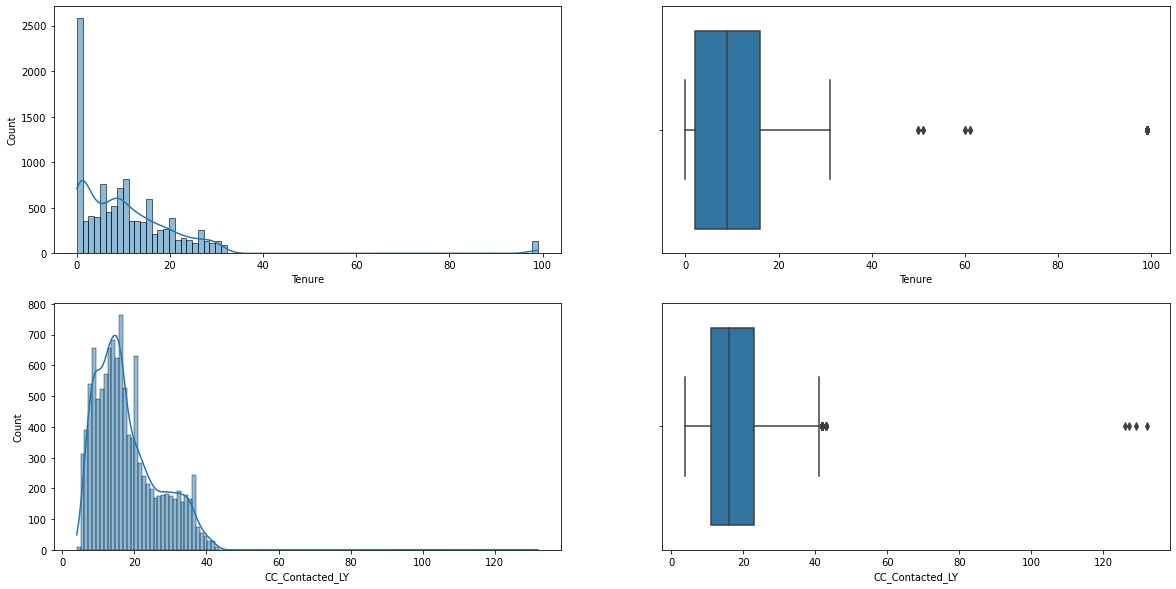

In [104]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

sns.histplot(com1['Tenure'],kde=True,ax = axes[0][0])
sns.boxplot(com1['Tenure'],ax = axes[0][1])

sns.histplot(com1['CC_Contacted_LY'],kde=True,ax = axes[1][0])
sns.boxplot(com1['CC_Contacted_LY'],ax = axes[1][1])

plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\li

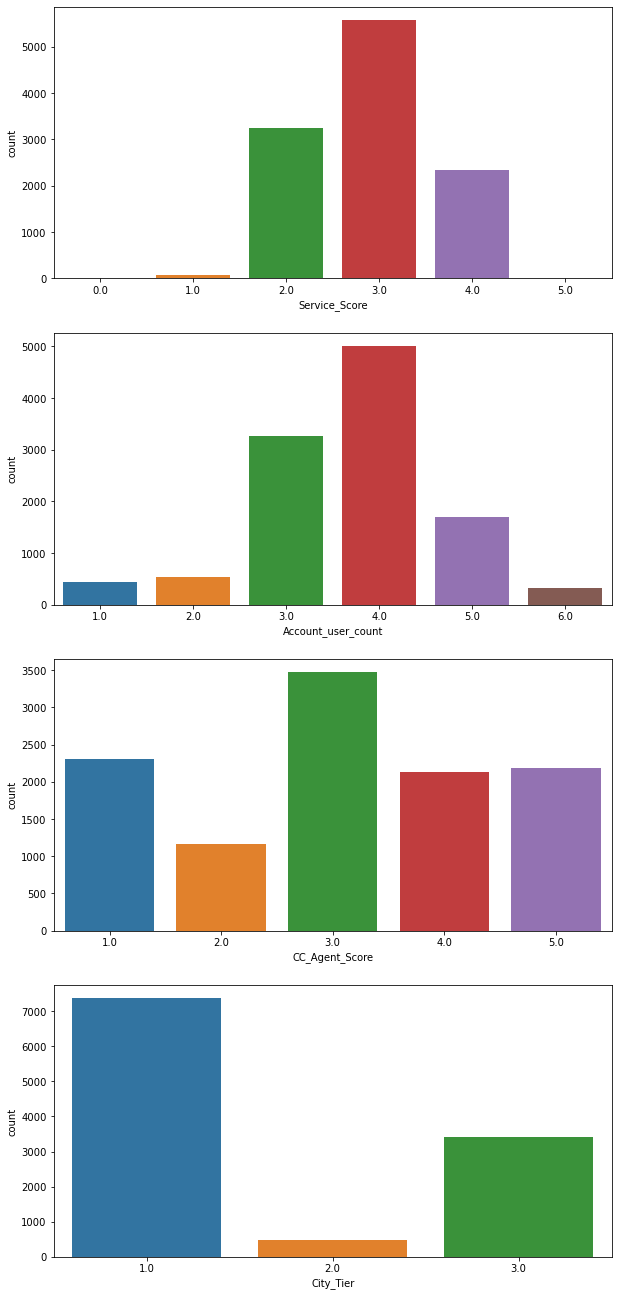

In [105]:
fig,axes = plt.subplots(nrows = 4, ncols = 1, figsize = (10,23))

sns.countplot(com1['Service_Score'],ax = axes[0])
sns.countplot(com1['Account_user_count'],ax = axes[1])
sns.countplot(com1['CC_Agent_Score'],ax = axes[2])
sns.countplot(com1['City_Tier'],ax = axes[3])
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


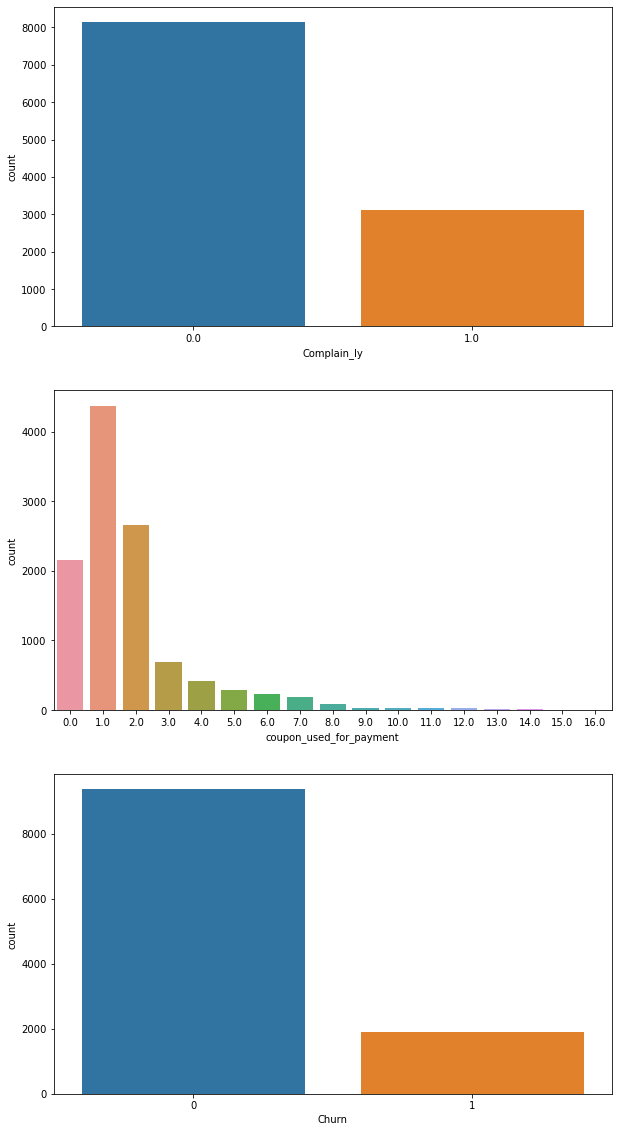

In [106]:
fig,axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,20))

sns.countplot(com1['Complain_ly'],ax = axes[0])
sns.countplot(com1['coupon_used_for_payment'],ax = axes[1])
sns.countplot(com1['Churn'],ax = axes[2])
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


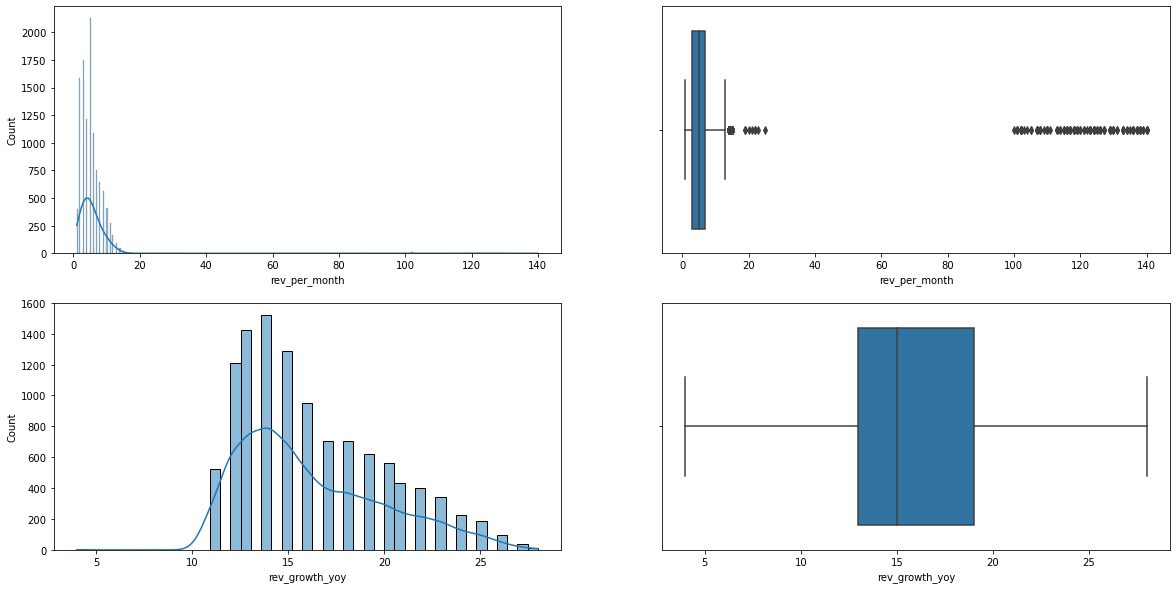

In [107]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

sns.histplot(com1['rev_per_month'],kde=True,ax = axes[0][0])
sns.boxplot(com1['rev_per_month'],ax = axes[0][1])

sns.histplot(com1['rev_growth_yoy'],kde=True,ax = axes[1][0])
sns.boxplot(com1['rev_growth_yoy'],ax = axes[1][1])

plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


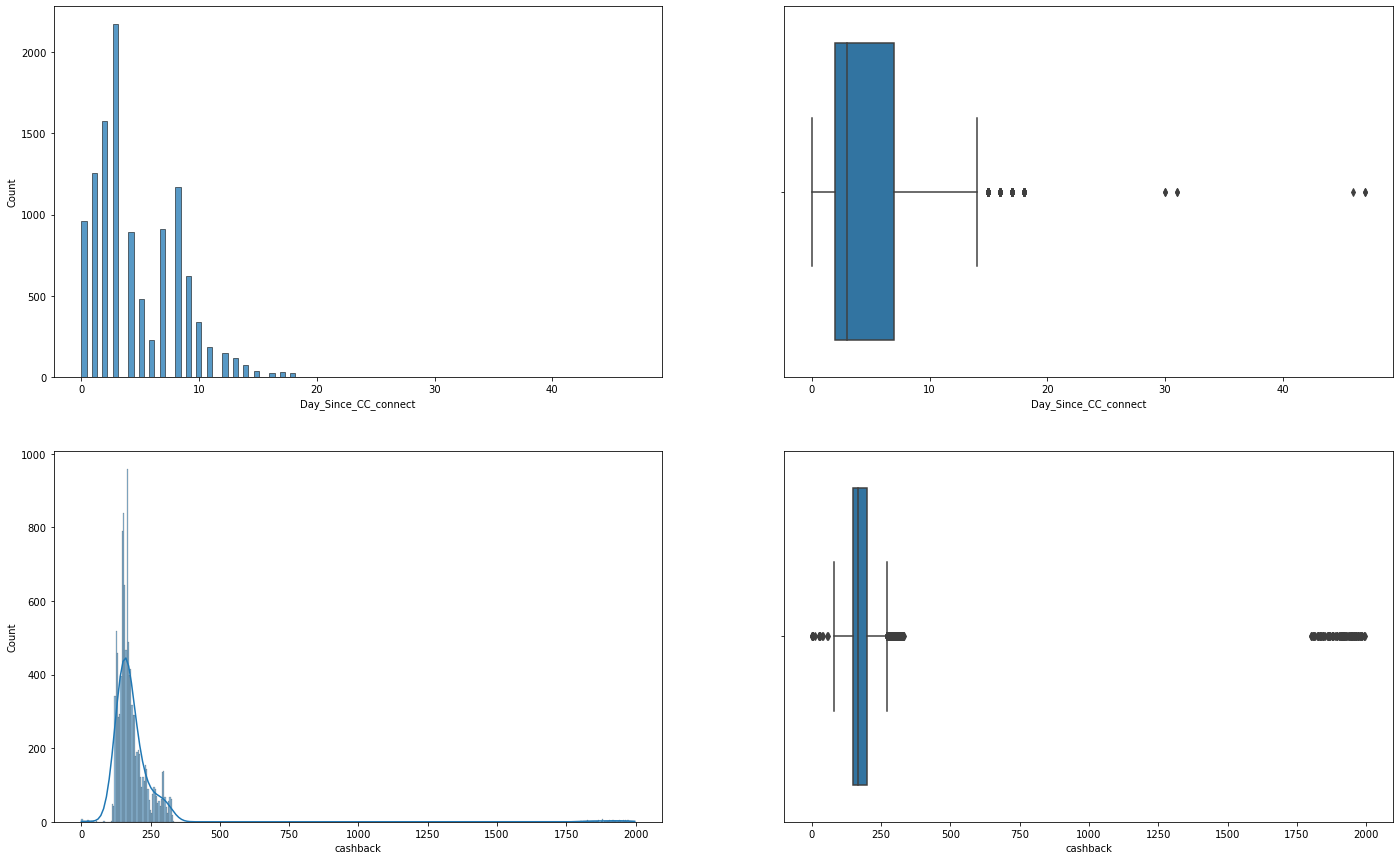

In [108]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (24,15))

sns.histplot(com1['Day_Since_CC_connect'],ax = axes[0][0])
sns.boxplot(com1['Day_Since_CC_connect'],ax = axes[0][1])

sns.histplot(com1['cashback'],kde=True,ax = axes[1][0])
sns.boxplot(com1['cashback'],ax = axes[1][1])

plt.show()

In [109]:
#### Multivariate Analysis:

<Figure size 1440x1152 with 0 Axes>

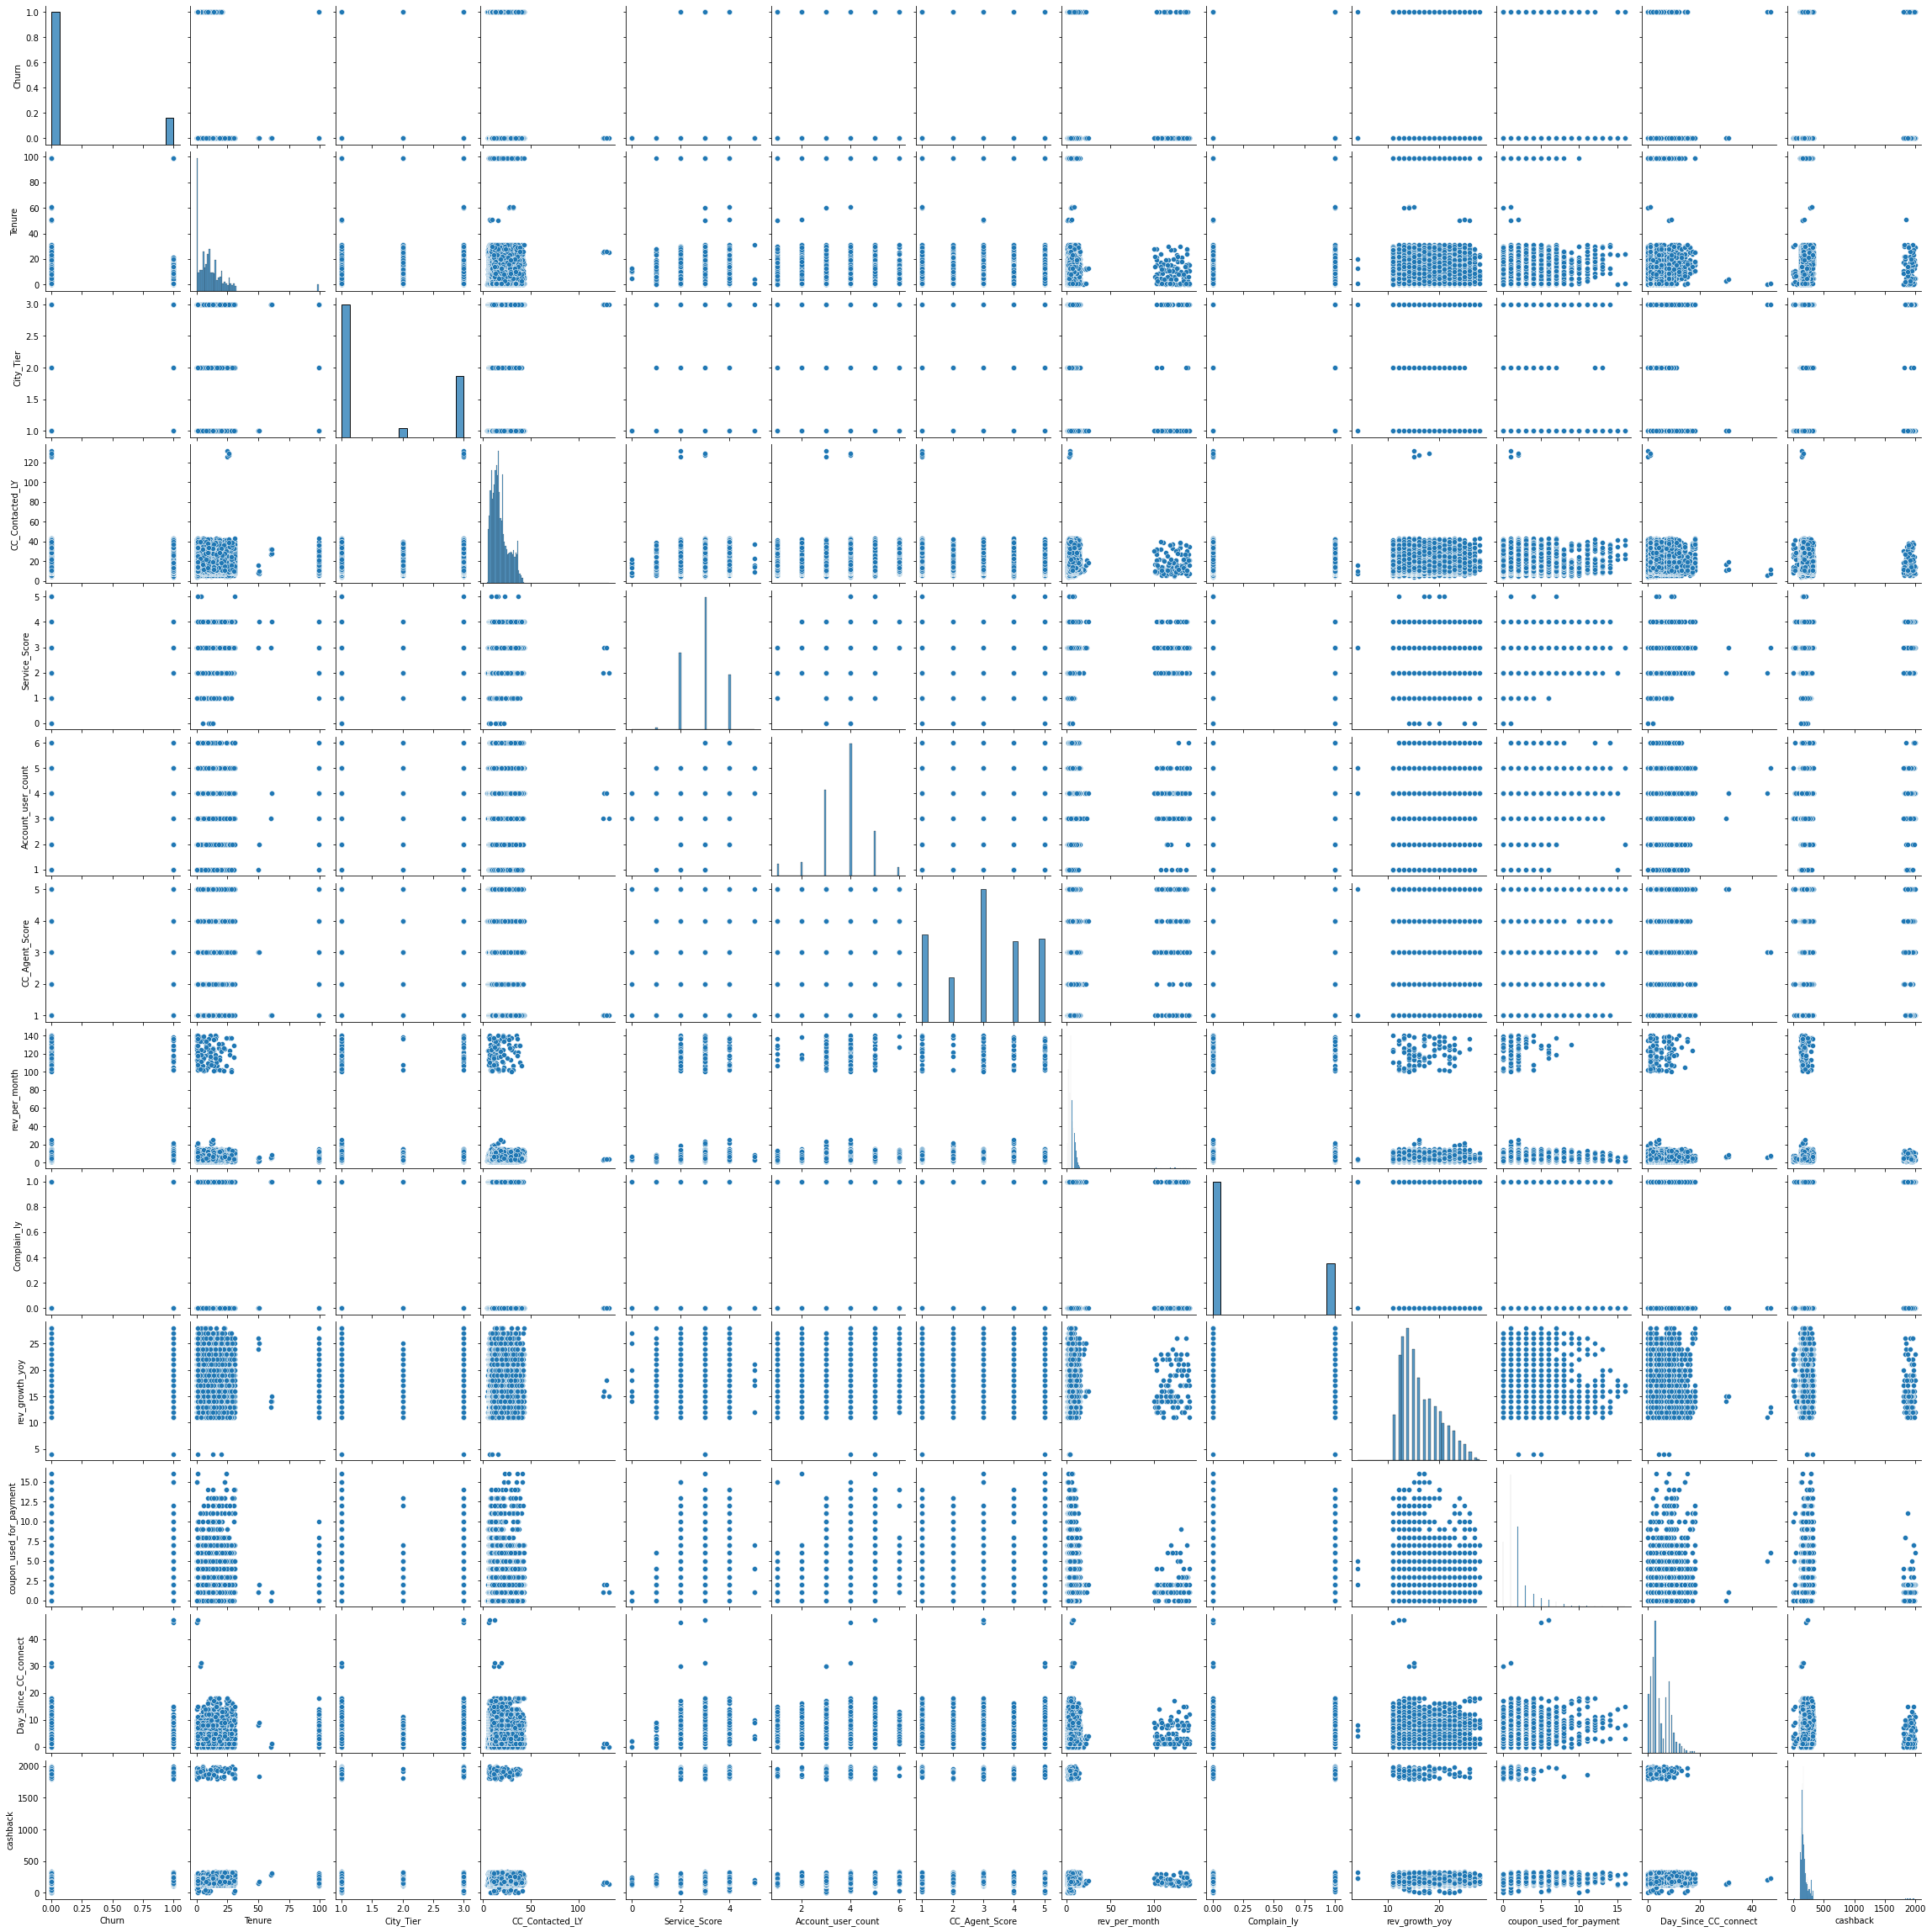

In [110]:
plt.figure(figsize = (20,16))

sns.pairplot(com1)
plt.show()

<AxesSubplot:>

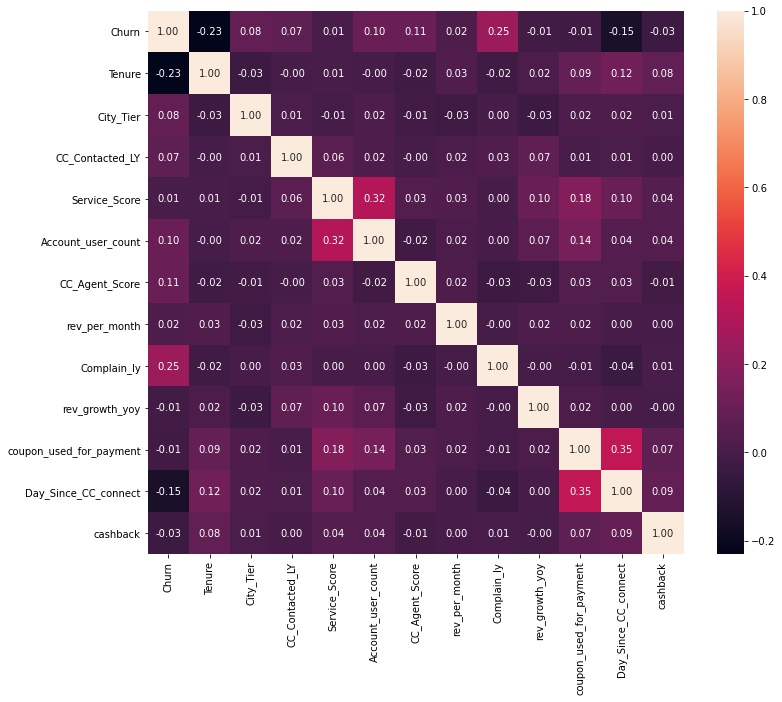

In [111]:
plt.figure(figsize = (12,10))
sns.heatmap(com1.corr(),annot = True,fmt = '.2f')

In [112]:
com1.head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93,Debit Card,Female,Super,Single,Mobile
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90,UPI,Male,Regular Plus,Single,Mobile
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,165.25,Debit Card,Male,Regular Plus,Single,Mobile
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07,Debit Card,Male,Super,Single,Mobile
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60,Credit Card,Male,Regular Plus,Single,Mobile
5,1,0.0,1.0,22.0,3.0,4.0,5.0,2.0,1.0,22.0,4.0,7.0,139.19,Debit Card,Female,Regular Plus,Single,Computer
6,1,2.0,3.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,0.0,120.86,Cash on Delivery,Male,Super,Divorced,Mobile
7,1,0.0,1.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,0.0,122.93,Credit Card,Male,Regular Plus,Divorced,Mobile
8,1,13.0,3.0,9.0,2.0,4.0,3.0,2.0,1.0,14.0,0.0,2.0,126.83,E wallet,Male,Regular Plus,Divorced,Mobile
9,1,0.0,1.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,122.93,Debit Card,Male,Regular Plus,Single,Mobile


In [113]:
com1.to_csv('note1_final.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#Reading the prepared data from earlier notebook:

In [ ]:
com2 = pd.read_csv('note1_final.csv')
com2.head()

com3 = com2.copy()

com3 = com3.drop('Unnamed: 0',axis = 1)
com3.head()

#### After second mentor discussion, it was decided that the number of outliers are extremely few in comparison to the number of records, which makes it meaningless to build a model for them and instead should be treated:

In [ ]:
data = com3[['Tenure','CC_Contacted_LY','rev_per_month','Day_Since_CC_connect','cashback']]

for i in range(0,len(data.columns)):
    fig = plt.figure(figsize = (20,15))
    ax = fig.add_subplot(3,2,i+1)
    sns.boxplot(data[data.columns[i]])
    plt.show()

In [ ]:
#We see that the above fields contain outliers.

In [ ]:
Q1 = com3.quantile(0.25)
Q3 = com3.quantile(0.75)
IQR = Q3-Q1
lower_range = Q1 - (1.5*IQR)
upper_range = Q3 + (1.5*IQR)

lower_range

upper_range

com3['Tenure'] = np.where(com3['Tenure']>37,37,com3['Tenure'])
com3['Tenure'] = np.where(com3['Tenure']<-19,-19,com3['Tenure'])

com3['CC_Contacted_LY'] = np.where(com3['CC_Contacted_LY']>41,41,com3['CC_Contacted_LY'])
com3['CC_Contacted_LY'] = np.where(com3['CC_Contacted_LY']<-7,-7,com3['CC_Contacted_LY'])

com3['rev_per_month'] = np.where(com3['rev_per_month']>13,13,com3['rev_per_month'])
com3['rev_per_month'] = np.where(com3['rev_per_month']<-3,-3,com3['rev_per_month'])

com3['Day_Since_CC_connect'] = np.where(com3['Day_Since_CC_connect']>14.5,14.5,com3['Day_Since_CC_connect'])
com3['Day_Since_CC_connect'] = np.where(com3['Day_Since_CC_connect']<-5.5,-5.5,com3['Day_Since_CC_connect'])

com3['cashback'] = np.where(com3['cashback']>271.44,271.44,com3['cashback'])
com3['cashback'] = np.where(com3['cashback']<73.76,73.76,com3['cashback'])

data1 = com3[['Tenure','CC_Contacted_LY','rev_per_month','Day_Since_CC_connect','cashback']]

for i in range(0,len(data1.columns)):
    fig = plt.figure(figsize = (20,15))
    ax = fig.add_subplot(3,2,i+1)
    sns.boxplot(data1[data1.columns[i]])
    plt.show()

#### Since python can only process the data in numeric form, we need to convert the exisiting categorical fields into encoded numerical valaues:

In [ ]:
com3.info()

In [ ]:
#Below are the categorical fields list:

In [ ]:
print(com3['City_Tier'].unique())
print(com3['Service_Score'].unique())
print(com3['CC_Agent_Score'].unique())
print(com3['Account_user_count'].unique())
print(com3['Complain_ly'].unique())
print(com3['Payment'].unique())
print(com3['Gender'].unique())
print(com3['account_segment'].unique())
print(com3['Marital_Status'].unique())
print(com3['Login_device'].unique())

In [ ]:
# For ordinal encding we have 'account_segment':

In [ ]:
com3['account_segment'] = com3['account_segment'].replace({'Regular':1,'Regular Plus':2,'Super':3,'Super Plus':4,'HNI':5})

com3['account_segment'].unique()

In [ ]:
# For nominal encding we have:

In [ ]:
for feature in com3.columns:
    if com3[feature].dtype == 'object':
        com3[feature] = pd.Categorical(com3[feature]).codes

In [ ]:
#Checking for all the categorical fields:

In [ ]:
com3.info()

com3.head(10)

com3['Marital_Status'].unique()

### Model Building:

##### For model building, we will be making the base model as Logistic Regression and then we will be building Decision tree, Random Forest and Neural Network based classifier models to make an evalaution for predictive modelling.

In [ ]:
# Splitting the data into train and test split:

In [ ]:
x = com3.drop('Churn',axis = 1)

y = com3['Churn']

x.head()

x.shape

y.head()

y.shape

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 123,test_size = 0.3)

In [ ]:
# Using scaling technique which will be required during Neural network model building:

In [ ]:
ss = StandardScaler()

x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

reg = LogisticRegression()
dt = tree.DecisionTreeClassifier(random_state = 123)
rf = RandomForestClassifier(random_state = 123)
annr = MLPClassifier(hidden_layer_sizes = (500),random_state = 123,max_iter = 10000)

models = [reg,dt,rf,annr]


scores_train = []
scores_test = []

for i in models:
    if (i!=annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train,y_train))
        scores_test.append(i.score(x_test,y_test))
        
    else:
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled,y_train))
        scores_test.append(i.score(x_test_scaled,y_test))
        

print(pd.DataFrame({'Train Score':scores_train,'Test Score':scores_test},
                  index = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','ANN Classifier']))

In [ ]:
# We see that our Decision Tree, Random Forest and ANN have been highly overfit models. Hence we need to fine tune the models:

#### Using Grid Search on Decision Tree

In [ ]:
dt = tree.DecisionTreeClassifier(criterion = 'gini')

dt.fit(x_train,y_train)

credit_tree_file = open('E:\\credit_tree.dot','w')

dot_data = tree.export_graphviz(dt,out_file = credit_tree_file, feature_names = list(x_train),class_names = ['No','Yes'])
credit_tree_file.close()

In [ ]:
#Looking at the decisision tree, we see that the tree needs pruning because of overgrown branches. Hence we prune in the follwing way:

In [ ]:
max_depth = 8 
min_samples_leaf = (2/100*11260) = 225
min_samples_split = 3*min_samples_leaf = 675

reg_dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=225,min_samples_split=675)

reg_dt.fit(x_train,y_train)

reg_dt_score_train = reg_dt.score(x_train,y_train)
reg_dt_score_test = reg_dt.score(x_test,y_test)


print(reg_dt_score_train,reg_dt_score_test)

In [ ]:
#We now see that our model is not overfit anymore. We can now apply grid search based on the above values.

In [ ]:
param_grid_dt = {'max_depth':[6,8,10,12],
              'min_samples_leaf':[50,100,200,225,300,350],
              'min_samples_split':[150,300,600,675,900,1250]}

dt = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 123)

grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv = 3)

grid_search_dt.fit(x_train,y_train)

print(grid_search_dt.best_params_)

reg_dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=50,min_samples_split=150)
reg_dt.fit(x_train,y_train)

reg_dt_score_train = reg_dt.score(x_train,y_train)
reg_dt_score_test = reg_dt.score(x_test,y_test)


print(reg_dt_score_train,reg_dt_score_test)

In [ ]:
#Performance metrics for DecisionTree:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_train,reg_dt.predict(x_train)))

print(classification_report(y_test,reg_dt.predict(x_test)))

#### Using Grid Search on Random Forest

In [ ]:
param_grid_rf = {'max_depth' :[6,8,10],
                 'max_features':[3,4,5],
                 'min_samples_leaf':[50,100,150,200],
                 'n_estimators':[200,300,500]}

rf = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rf,param_grid = param_grid_rf, cv=3)

grid_search_rf.fit(x_train,y_train)

grid_search_rf.best_params_

grid_search_rf.best_estimator_

reg_rf = grid_search_rf.best_estimator_

print(classification_report(y_train,reg_rf.predict(x_train)))

print(classification_report(y_test,reg_rf.predict(x_test)))

#### Using Grid Search for Neural Network

In [ ]:
annr = MLPClassifier(hidden_layer_sizes = 100, max_iter = 5000, solver = 'sgd', verbose = True, random_state = 123, tol = 0.0001)

annr.fit(x_train_scaled,y_train)

print(classification_report(y_train,annr.predict(x_train_scaled)))
print(classification_report(y_test,annr.predict(x_test_scaled)))

param_grid_annr = {'hidden_layer_sizes':[(100),(500),(100,100)],
                   'activation': ['tanh','relu'],
                   'solver':['sgd','adam']}

annr = MLPClassifier(max_iter = 2000, random_state = 123)

grid_search_annr = GridSearchCV(estimator = annr,param_grid = param_grid_annr, cv=3)

grid_search_annr.fit(x_train_scaled,y_train)

reg_annr = grid_search_annr.best_estimator_
reg_annr

print(classification_report(y_train,reg_annr.predict(x_train_scaled)))
print(classification_report(y_test,reg_annr.predict(x_test_scaled)))

reg_annr = MLPClassifier(hidden_layer_sizes = 500, max_iter = 5000, solver = 'adam', verbose = True, random_state = 123, tol = 0.001,activation = 'relu')

reg_annr.fit(x_train_scaled,y_train)

print(classification_report(y_train,reg_annr.predict(x_train_scaled)))
print(classification_report(y_test,reg_annr.predict(x_test_scaled)))

In [ ]:
#After tuning the models, comparing the model metrics:

In [ ]:
scores_train1 = []
scores_test1 = []

reg_models = [reg,reg_dt,reg_rf,reg_annr]

for i in reg_models:
    if (i!=reg_annr):
        i.fit(x_train,y_train)
        scores_train1.append(i.score(x_train,y_train))
        scores_test1.append(i.score(x_test,y_test))
        
    else:
        i.fit(x_train_scaled,y_train)
        scores_train1.append(i.score(x_train_scaled,y_train))
        scores_test1.append(i.score(x_test_scaled,y_test))
        

print(pd.DataFrame({'Train Score1':scores_train1,'Test Score1':scores_test1},
                  index = ['Logistic Regression1','Decision Tree Classifier1','Random Forest Classifier1','ANN Classifier1']))



#### From the above comparison table we find that when it comes to accuracy, ANN performs the best. However the difference between the train rmse and test rmse is fairly large for the model. Hence we finalise Random Forest for our modelling since it has the highest train-test score as well as least difference between train and test rmse.

In [ ]:
print(classification_report(y_train,reg_rf.predict(x_train)))

print(classification_report(y_test,reg_annr.predict(x_test_scaled)))

print(classification_report(y_test,reg.predict(x_test)))

reg_rf.feature_importances_

print(pd.DataFrame(reg_rf.feature_importances_,columns = ['Imp'], index = x_train.columns))

#### Notes from modelling:

#### We see that the fields 'Login_device','Gender','coupon_used_for_payment','Service score' have the least importances in the modelling.

#### The 'Tenure','Complain_ly','rev_per_month','cashback' and 'account_segment' have the highest relevances.

In [ ]:
#Undersampling/Oversmpling:

##### We see that the model might have some scope of improvement when it comes to precision. We can use SMOTE to see how it performs:

In [ ]:
com3['Churn'].value_counts()/(com3['Churn'].shape)

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

com4 = com3.copy()

com4['Churn'].value_counts()/(com4['Churn'].shape)

counter = Counter(com4['Churn'])
counter

x_train_smote = x_train
y_train_smote = y_train

sample = SMOTE()
x_train_smote,y_train_smote = sample.fit_resample(x_train_smote,y_train_smote)

y_train_smote.value_counts()

In [ ]:
#Training the model with smote data and seeing metrics:

reg_rf.fit(x_train_smote,y_train_smote)

print(classification_report(y_train_smote,reg_rf.predict(x_train_smote)))

print(classification_report(y_test,reg_rf.predict(x_test)))

In [ ]:
# Checking metrics for all the models for smote data:

scores_train2 = []
scores_test2 = []

smote_models = [reg,reg_dt,reg_rf,reg_annr]

In [ ]:
#Scaling SMOTE data:

In [ ]:
ss = StandardScaler()
x_train_smote_scaled = ss.fit_transform(x_train_smote)
x_test_scaled = ss.transform(x_test)

for i in smote_models:
    if (i!=reg_annr):
        i.fit(x_train_smote,y_train_smote)
        scores_train2.append(i.score(x_train_smote,y_train_smote))
        scores_test2.append(i.score(x_test,y_test))
        
    else:
        i.fit(x_train_scaled,y_train)
        scores_train2.append(i.score(x_train_smote_scaled,y_train_smote))
        scores_test2.append(i.score(x_test_scaled,y_test))
        

print(pd.DataFrame({'Train Score smote':scores_train2,'Test Score smote':scores_test2},
                  index = ['Logistic Regression2','Decision Tree Classifier2','Random Forest Classifier2','ANN Classifier2']))



In [ ]:
#We see that the overall accuracy decreases after performing a smote modelling.

print('Logistic regression metrics')
print(classification_report(y_train_smote,reg.predict(x_train_smote)))
print(classification_report(y_test,reg.predict(x_test)))
print('Decision Tree metrics')
print(classification_report(y_train_smote,reg_dt.predict(x_train_smote)))
print(classification_report(y_test,reg_dt.predict(x_test)))
print('Random Forest metrics')
print(classification_report(y_train_smote,reg_rf.predict(x_train_smote)))
print(classification_report(y_test,reg_rf.predict(x_test)))
print('ANN metrics')
print(classification_report(y_train_smote,reg_annr.predict(x_train_smote)))
print(classification_report(y_test,reg_annr.predict(x_test)))

#### We see that the models have decent accuracy and rmse differences for test and train for SMOTE data, but it leads to a significant fall in model metrics like precision,f1-score. Hence we will be using non SMOTE data to build predicitve modelling.

### Prediciting probabilities of customers churning:

In [ ]:
reg_rf.fit(x_train,y_train)

prob = reg_rf.predict_proba(x)

prob = prob[:,1] #probability for churners(1) customers

com3['Prob of Churn'] = prob

com3.head()

#### We now have the churning probabilities of each customer for the given data set.

In [ ]:
com3.to_csv('prob_output.csv')

In [ ]:
scores_train1 = []
scores_test1 = []

reg_models = [reg,reg_dt,reg_rf,reg_annr]

for i in reg_models:
    if (i!=reg_annr):
        i.fit(x_train,y_train)
        scores_train1.append(i.score(x_train,y_train))
        scores_test1.append(i.score(x_test,y_test))
        
    else:
        i.fit(x_train_scaled,y_train)
        scores_train1.append(i.score(x_train_scaled,y_train))
        scores_test1.append(i.score(x_test_scaled,y_test))
       

print(pd.DataFrame({'Train Score1':scores_train1,'Test Score1':scores_test1},
                  index = ['Logistic Regression1','Decision Tree Classifier1','Random Forest Classifier1','ANN Classifier1']))

In [ ]:
report = classification_report(y_train_smote, reg.predict(x_train_smote), output_dict=True )

macro_precision =  report['weighted avg']['precision']
macro_recall =  report['weighted avg']['recall']
macro_f1 =  report['weighted avg']['f1-score']
macro_accuracy =  report['accuracy']

print(macro_precision)
print(macro_recall)
print(macro_f1)
print(macro_accuracy)

scores_train_f = []
precision_train_f = []
recall_train_f = []
f1score_train_f = []

scores_test_f = []
precision_test_f = []
recall_test_f = []
f1score_test_f = []

reg_models_f = [reg,reg_dt,reg_rf,reg_annr]

In [ ]:
# Train metrics-

for i in reg_models_f:
    if (i!=reg_annr):
        i.fit(x_train,y_train)
        
        scores_train_f.append(i.score(x_train,y_train))
        precision_train_f.append(classification_report(y_train,i.predict(x_train), output_dict=True )['weighted avg']['precision'])
        recall_train_f.append(classification_report(y_train,i.predict(x_train), output_dict=True )['weighted avg']['recall'])
        f1score_train_f.append(classification_report(y_train,i.predict(x_train), output_dict=True )['weighted avg']['f1-score'])
    else:
        i.fit(x_train_scaled,y_train)
        
        scores_train_f.append(i.score(x_train_scaled,y_train))
        precision_train_f.append(classification_report(y_train,i.predict(x_train_scaled), output_dict=True )['weighted avg']['precision'])
        recall_train_f.append(classification_report(y_train,i.predict(x_train_scaled), output_dict=True )['weighted avg']['recall'])
        f1score_train_f.append(classification_report(y_train,i.predict(x_train_scaled), output_dict=True )['weighted avg']['f1-score'])


In [ ]:
# Test metrics-

for i in reg_models_f:
    if (i!=reg_annr):
        i.fit(x_test,y_test)
        scores_test_f.append(i.score(x_test,y_test))
        precision_test_f.append(classification_report(y_test,i.predict(x_test), output_dict=True )['macro avg']['precision'])
        recall_test_f.append(classification_report(y_test,i.predict(x_test), output_dict=True )['macro avg']['recall'])
        f1score_test_f.append(classification_report(y_test,i.predict(x_test), output_dict=True )['macro avg']['f1-score'])
    else:
        i.fit(x_test_scaled,y_test)
        scores_test_f.append(i.score(x_test_scaled,y_test))
        precision_test_f.append(classification_report(y_test,i.predict(x_test_scaled), output_dict=True )['macro avg']['precision'])
        recall_test_f.append(classification_report(y_test,i.predict(x_test_scaled), output_dict=True )['macro avg']['recall'])
        f1score_test_f.append(classification_report(y_test,i.predict(x_test_scaled), output_dict=True )['macro avg']['f1-score'])
        


In [ ]:
print('Train Metrics')
print(pd.DataFrame({'Accuracy':scores_train_f,'Precision':precision_train_f,
                   'Recall': recall_train_f,'f1 Score': f1score_train_f},
                  index = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','ANN Classifier']))

print('Test Metrics')
print(pd.DataFrame({'Accuracy':scores_test_f,'Precision':precision_test_f,
                   'Recall': recall_test_f,'f1 Score': f1score_test_f},
                  index = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','ANN Classifier']))